<a href="https://colab.research.google.com/github/Xergon-sci/Predicting-chemical-hardness-A-study-using-machine-learning-and-artificial-neural-networks/blob/master/Model3_F3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qml

     |████████████████████████████████| 51kB 1.5MB/s 
  Created wheel for qml: filename=qml-0.4.0.27-cp36-cp36m-linux_x86_64.whl size=976231 sha256=dfbaaa5ccb6cd3ca7a55fd959b16a9e59532d39f50530a76ee74c1c8088ddb5c
  Stored in directory: /root/.cache/pip/wheels/ed/12/cf/9f6f875260ccc47dbdbd131631c416e24c933c84a8a20e2bc8
Successfully built qml


In [ ]:
import numpy as np
import pandas as pd
import qml
from qml.kernels import gaussian_kernel
from qml.math import cho_solve
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
# Generate the coulomb matrix and the kernel
mols = []
atom_cnts = []

# Load all molecules in the molecule objects
i = 1
while i <= 5000:
  mol = qml.Compound("/content/drive/My Drive/vub/xyz/mol{}.txt".format(i))
  atom_cnts.append(mol.natoms)
  mols.append(mol)
  print("mol{}.xyz".format(i))
  i += 1

Streaminguitvoer ingekort tot de laatste 5000 regels.
mol2.xyz
mol3.xyz
mol4.xyz
mol5.xyz
mol6.xyz
mol7.xyz
mol8.xyz
mol9.xyz
mol10.xyz
mol11.xyz
mol12.xyz
mol13.xyz
mol14.xyz
mol15.xyz
mol16.xyz
mol17.xyz
mol18.xyz
mol19.xyz
mol20.xyz
mol21.xyz
mol22.xyz
mol23.xyz
mol24.xyz
mol25.xyz
mol26.xyz
mol27.xyz
mol28.xyz
mol29.xyz
mol30.xyz
mol31.xyz
mol32.xyz
mol33.xyz
mol34.xyz
mol35.xyz
mol36.xyz
mol37.xyz
mol38.xyz
mol39.xyz
mol40.xyz
mol41.xyz
mol42.xyz
mol43.xyz
mol44.xyz
mol45.xyz
mol46.xyz
mol47.xyz
mol48.xyz
mol49.xyz
mol50.xyz
mol51.xyz
mol52.xyz
mol53.xyz
mol54.xyz
mol55.xyz
mol56.xyz
mol57.xyz
mol58.xyz
mol59.xyz
mol60.xyz
mol61.xyz
mol62.xyz
mol63.xyz
mol64.xyz
mol65.xyz
mol66.xyz
mol67.xyz
mol68.xyz
mol69.xyz
mol70.xyz
mol71.xyz
mol72.xyz
mol73.xyz
mol74.xyz
mol75.xyz
mol76.xyz
mol77.xyz
mol78.xyz
mol79.xyz
mol80.xyz
mol81.xyz
mol82.xyz
mol83.xyz
mol84.xyz
mol85.xyz
mol86.xyz
mol87.xyz
mol88.xyz
mol89.xyz
mol90.xyz
mol91.xyz
mol92.xyz
mol93.xyz
mol94.xyz
mol95.xyz
mol96.xyz
mol9

In [ ]:
features = []

# Generate the coulomb matrix for each molecule.
max_atom = np.amax(atom_cnts)
for m in mols:
  m.generate_coulomb_matrix(max_atom)
  features.append(m.representation)

print("All features converted to coulomb matrices.")

All features converted to coulomb matrices.


In [ ]:
# Import the hardness
df = pd.read_table('/content/drive/My Drive/vub/dataset_F3.txt', sep='\t')
labels = df['n'].values

#---------- Preprocessing the data ----------
# Get the scaler from sci-kit learn
scaler = MinMaxScaler()

# Scale the features and the labels = normalization
scaled_features = scaler.fit_transform(features)
scaled_labels = labels / 10

# Split the set into training and validation 70/30
training_features, v_and_t_features, training_labels, v_and_t_labels = train_test_split(scaled_features, scaled_labels, test_size=0.3)

# Split the v and t features equally
validation_features, test_features, validation_labels, test_labels = train_test_split(v_and_t_features, v_and_t_labels, test_size=0.5)

# Convert to array
training_features = np.asarray(training_features)
test_features = np.asarray(test_features)
validation_features = np.asarray(validation_features)

# These labels are used for training
training_labels = training_labels.astype(np.float)
validation_labels = validation_labels.astype(np.float)

# These labels are used for comparing only so they can be denormalized
test_labels = test_labels.astype(np.float)
test_labels = test_labels * 10

# Print the types of each set each set should be of type float
print('training features: ', training_features.dtype)
print('training labels: ', training_labels.dtype)
print('validation features: ', validation_features.dtype)
print('validation labels: ', validation_labels.dtype)
print('test features: ', test_features.dtype)
print('test labels: ', test_labels.dtype)

training features:  float64
training labels:  float64
validation features:  float64
validation labels:  float64
test features:  float64
test labels:  float64


In [ ]:
# Implement the kernel ridge regression
model = KernelRidge(alpha=0.01, degree=3)

# Train the model
model.fit(training_features, training_labels)

KernelRidge(alpha=0.01, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

In [ ]:
# Make predictions based on the test set
test_predictions = model.predict(test_features)

# De normalize the predictions
test_predictions = test_predictions *10

# Calculate some statistics
mean_predictions = np.mean(test_predictions)
MAE = metrics.mean_absolute_error(test_labels, test_predictions)
MSE = metrics.mean_squared_error(test_labels, test_predictions)
RMSE = np.sqrt(metrics.mean_squared_error(test_labels, test_predictions))
accuracy = (1 - (RMSE / mean_predictions)) * 100

# Print the statistics
print('Mean Absolute Error:', MAE)  
print('Mean Squared Error:', MSE)  
print('Root Mean Squared Error:', RMSE)
print('Accuracy', accuracy)

# Plot some statistics
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions, s=2)
plt.title('Truth of predictions')
plt.xlabel('True Values / eV')
plt.ylabel('Predictions / eV')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()
plt.close()

error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.title('Error on prediction')
plt.xlabel("Prediction Error / eV")
_ = plt.ylabel("Count")
plt.show()
plt.close()

Max Error: 9.78172 (+/- 13.71975)
MAE: 0.49522 (+/- 0.07098)
MSE: 0.07828 (+/- 0.10464)
RMSE: 0.83908 (+/- 0.56130)


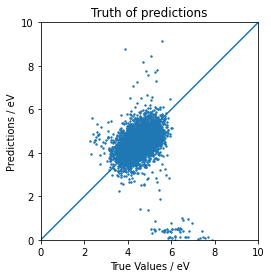

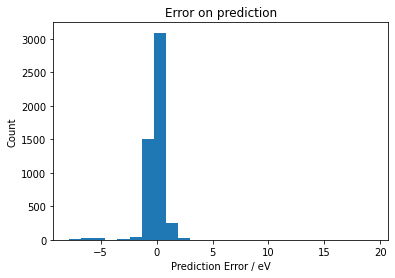

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

scoring = ['max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
scores = cross_validate(model, scaled_features, scaled_labels, cv=kf, scoring=scoring)

cv_predictions = cross_val_predict(model, scaled_features, scaled_labels, cv=kf)

print("Max Error: %0.5f (+/- %0.5f)" % (-(scores['test_max_error'].mean()*10), scores['test_max_error'].std() * 2*10))
print("MAE: %0.5f (+/- %0.5f)" % (-(scores['test_neg_mean_absolute_error'].mean()*10), scores['test_neg_mean_absolute_error'].std() * 2*10))
print("MSE: %0.5f (+/- %0.5f)" % (-(scores['test_neg_mean_squared_error'].mean()*10), scores['test_neg_mean_squared_error'].std() * 2*10))
print("RMSE: %0.5f (+/- %0.5f)" % (-(scores['test_neg_root_mean_squared_error'].mean()*10), scores['test_neg_root_mean_squared_error'].std() * 2*10))


denorm_cv_predictions = cv_predictions *10

# Plot some statistics
a = plt.axes(aspect='equal')
plt.scatter(labels, denorm_cv_predictions, s=2)
plt.title('Truth of predictions')
plt.xlabel('True Values / eV')
plt.ylabel('Predictions / eV')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()
plt.close()

error = denorm_cv_predictions - labels
plt.hist(error, bins = 25)
plt.title('Error on prediction')
plt.xlabel("Prediction Error / eV")
_ = plt.ylabel("Count")
plt.show()
plt.close()